# U1.2 Continuous variables and Bayes' rule

# Index

1. Continuous variables
2. Bayes' theorem in the continuous case
3. Bayes' decision rule
4. Generative and discriminative classifiers

# 1 Continuous variables

**Probability density function:** $\;$ Usual characterization of continuous variables for the representation of probabilistic knowledge
$$p(x)\geq 0 \quad \text{for all $x$} \qquad \text{and} \qquad \int p(x)\,dx = 1$$

**The normal density:** $\;p(x)\sim\mathcal{N}(\mu, \sigma^2)$
$$p(x)=\frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{(x-\mu)^2}{2\,\sigma^2} \,\right)\qquad%
P(x\in[\mu\pm 1.96\sigma])=0.95$$

**Example:** $\;$ normal densities with $\,\mu=0\,$ and $\,\sigma^2=0.5, 1, 2$

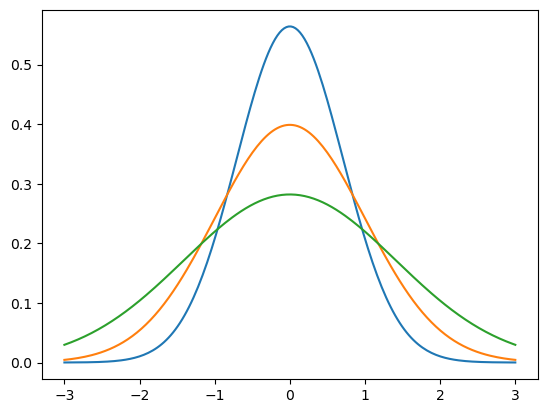

In [2]:
import numpy as np; from scipy.stats import norm; import matplotlib.pyplot as plt
x = np.linspace(-3, 3, 200)
plt.plot(x, norm.pdf(x, 0, np.sqrt(0.5)), x, norm.pdf(x, 0, 1), x, norm.pdf(x, 0, np.sqrt(2)));

# 2 Bayes theorem in the continuous case

**Bayes theorem in the continuous case:** $\;$ Probability of a hypothesis $\,y\,$ after observing (new) evidence $x$
$$P(y\mid x) = P(y)\,\frac{p(x\mid y)}{p(x)}$$

**Example:** $\;x=\,$ result of a saliva test for caries diagnosis
* Without caries, $\,c=0,\,p(x\mid c=0)\sim\mathcal{N}(\mu=0, \sigma^2=1)$
* With caries, $\,c=0,\,p(x\mid c=1)\sim\mathcal{N}(\mu=2, \sigma^2=0.5)$
* We know that the probability (a priori) of caries is: $\,P(c=1)=0.34$
* **If the test gives $x=2$, what is the (posterior) probability of caries?**
$$P(c=1\mid x=2) = P(c=1)\,\dfrac{p(x=2\mid c=1)}{p(x=2)} = 0.340\, \dfrac{0.798}{0.307} = 0.884$$
* Note that first it was necessary to find the (density of) probability (a priori) of test $x=2$:
$$\begin{align*}
p(x=2)&=P(c=0)p(x=2\mid c=0)+P(c=1)p(x=2\mid c=1)\\
&=(1-0.34)\cdot 0.054+0.34\cdot 0.798=0.307
\end{align*}$$

In [3]:
Pc1 = 0.34; px2Dc0 = norm.pdf(2, 0, 1); px2Dc1 = norm.pdf(2, 2, 0.5)
px2 = (1-Pc1) * px2Dc0 + Pc1 * px2Dc1; Pc1Dx2 = Pc1 * px2Dc1 / px2
print(f"px2Dc0 = {px2Dc0:.3f}  px2Dc1 = {px2Dc1:.3f}  px2 = {px2:.3f}  Pc1Dx2 = {Pc1Dx2:.3f}")

px2Dc0 = 0.054  px2Dc1 = 0.798  px2 = 0.307  Pc1Dx2 = 0.884


# 3 Bayes' decision rule

**Bayes' decision rule:** $\;$ Predicts a hypothesis after observing some evidence $\,x\,$ by choosing, from a set of possible hypotheses $\,\mathcal{C},\,$ a hypothesis of maximum **posterior probability** (from the observation of the evidence)
$$c^*(x) = \operatorname*{argmax}_{c\in\mathcal{C}} \; P(c\mid x)$$

**Probability of error:** $\;$ That is, the probability that the predicted hypothesis is different from the correct one
$$P(\text{error}\mid x)=1-P(c^*(x)\mid x)$$

**Bayes' rule optimality:** $\;$ No other choice would improve this error probability!

**Dentist example:**
$$c^*(x=2)=\operatorname*{argmax}_c\left(\begin{array}{l}
     P(c=0\mid x=2) = 0.116\\ %
     P(c=1\mid x=2) = 0.884\end{array}\right)=1$$

**Bayes' rule based on prior probabilities and conditional (densities) of classes:** $\;$ Instead of (arg-)maximize $\,P(c\mid x)\,$ in $ c$, we do it as a function of $\,P(c)\,p(x\mid c)$ since the result is the same
$$\begin{align*}
   c^*(x) &= \operatorname*{argmax}_{c\in\mathcal{C}} \; P(c\mid x)\\
          &= \operatorname*{argmax}_{c\in\mathcal{C}} \; P(c)\,\frac{p(x\mid c)}{p(x)}\\
          &= \operatorname*{argmax}_{c\in\mathcal{C}} \; P(c)\,p(x\mid c)
\end{align*}$$

**Dentist example:**
$$c^*(x=2)=\operatorname*{argmax}_c\left(\begin{array}{l}
P(c=0)\,p(x=2\mid c=0) = 0.036\\ %
P(c=1)\,p(x=2\mid c=1) = 0.271
\end{array}\right)=1$$

# 4 Generative and discriminative classifiers

**Bayes' rule in classification:** $\;$ The hypotheses are the classes and the evidence $x$ is an object that we classify with minimal error probability
$$c^*(x) = \operatorname*{argmax}_{c\in\mathcal{C}} \; P(c\mid x) %
= \operatorname*{argmax}_{c\in\mathcal{C}} \; p(x, c) %
= \operatorname*{argmax}_{c\in\mathcal{C}} \; P(c)\,p(x\mid c)$$

**Generative classifiers:** $\;$ Classify based on (estimated) priors and conditional probability densities

**Discriminatory classifiers:** $\;$ Classify based on the (estimated) posterior  probabilities

**Basic comparison between generative and discriminative:**
* **Feature preprocessing:** $\;$ Discriminative ones more flexible because, unlike generative ones, they do not require modeling probability densities over the data representation space
* **Difficulty of learning:** $\;$ Easier in the case of generatives, usually with counts and averages
* **Predictive accuracy:** $\;$ Better the discriminative ones since modeling $\,P(c\mid x)\,$ directly is usually easier than doing it through the conditionals of the classes
* **Treatment of new classes:** $\;$ Simpler in the case of generatives because they allow adding new classes to a problem without re-training the conditionals of the previous classes